# House Price Prediction in Bengaluru

### Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset:

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Bharat Intern\Dataset_Downloads\HPP\Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Basic data inspections:

### Information about the entire dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Description of the dataset:

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Displaying the first few values from the top of the dataset:

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Displaying the Last few values from the dataset:

In [7]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


### Checking total number of rows and columns in a dataset:

In [8]:
df.shape

(13320, 9)

### Columns in the dataset:

In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Datatypes of all the columns in a dataset:

In [10]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

### Checking for unique values of each columns in a dataset:

In [11]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [13]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [18]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [19]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

### Checking for the value count of each col in datatset:

In [20]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [21]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [22]:
df['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [23]:
df['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [24]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [25]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [26]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [27]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

### dropping the unwanted columns from the dataset:

In [28]:
df = df.drop(['society','availability'], axis=1)

In [29]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


### check for the shape of dataset after dropping the unwanted cols in dataset:

In [30]:
df.shape

(13320, 7)

### Dropping all the null values:

In [31]:
new_df=df.dropna()

In [32]:
new_df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


### Check for the null values again:

In [33]:
new_df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

###  check for the shape again:

In [34]:
new_df.shape

(12710, 7)

### Adding new feature for BHK:

In [35]:
new_df['bhk'] = new_df['size'].apply(lambda x: int(x.split(' ')[0]))
new_df.bhk.unique()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2704\1024085870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bhk'] = new_df['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [36]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [37]:
new_df[~new_df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [38]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [39]:
new_data=new_df.copy()
new_data.total_sqft = new_data.total_sqft.apply(convert_sqft_to_num)
new_data= new_data[new_data.total_sqft.notnull()]
new_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [40]:
new_data['total_sqft'].value_counts()

total_sqft
1200.0    788
1100.0    218
1500.0    198
2400.0    177
600.0     172
         ... 
2435.0      1
2424.0      1
2863.0      1
3680.0      1
4689.0      1
Name: count, Length: 1886, dtype: int64

In [41]:
new_data.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

### Adding new feature called price per square feet:

In [42]:
data=new_data.copy()
data['price_per_sqft'] = data['price']*100000/data['total_sqft']
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [43]:
data_stats = data['price_per_sqft'].describe()
data_stats

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

### Statistics of the dataset:

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [44]:
data.location = data.location.apply(lambda x: x.strip())
location_stats = data['location'].value_counts(ascending=False)
location_stats

location
Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: count, Length: 1248, dtype: int64

In [45]:
location_stats.values.sum()

12668

In [46]:
len(location_stats[location_stats>10])

235

## Dimensionality Reduction
####  Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [47]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: count, Length: 1013, dtype: int64

In [48]:
len(data.location.unique())

1248

In [49]:
data.location = data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data.location.unique())

236

In [50]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


### Removing outliers:

In [51]:
data[data.total_sqft/data.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [52]:
data.shape

(12668, 9)

In [53]:
data_update = data[~(data.total_sqft/data.bhk<300)]
data_update.shape

(12013, 9)

In [54]:
data_update.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

data_up = remove_pps_outliers(data_update)
print(data_up.shape)

(9852, 9)


### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like:

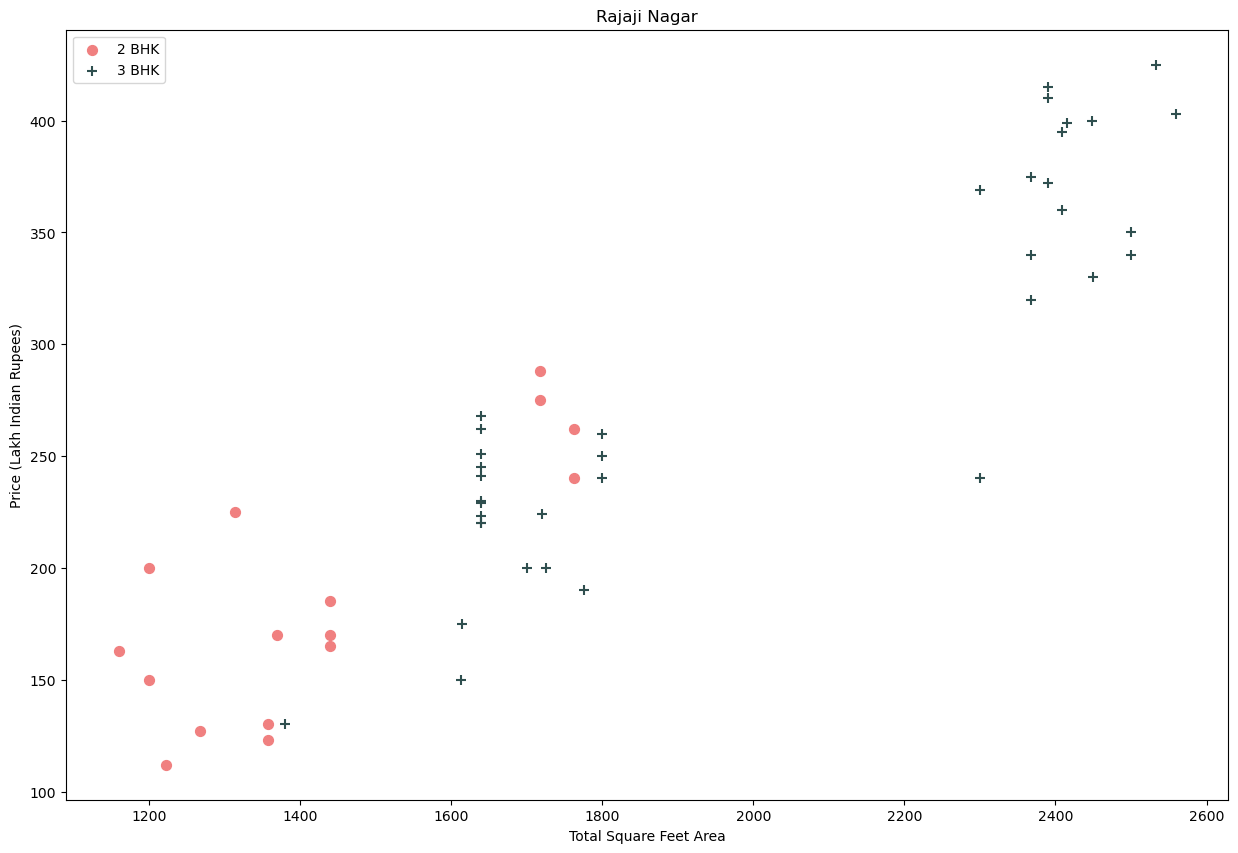

In [56]:
import matplotlib

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color='lightcoral', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='darkslategray', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data_up, "Rajaji Nagar")
plt.show()


Text(0, 0.5, 'Count')

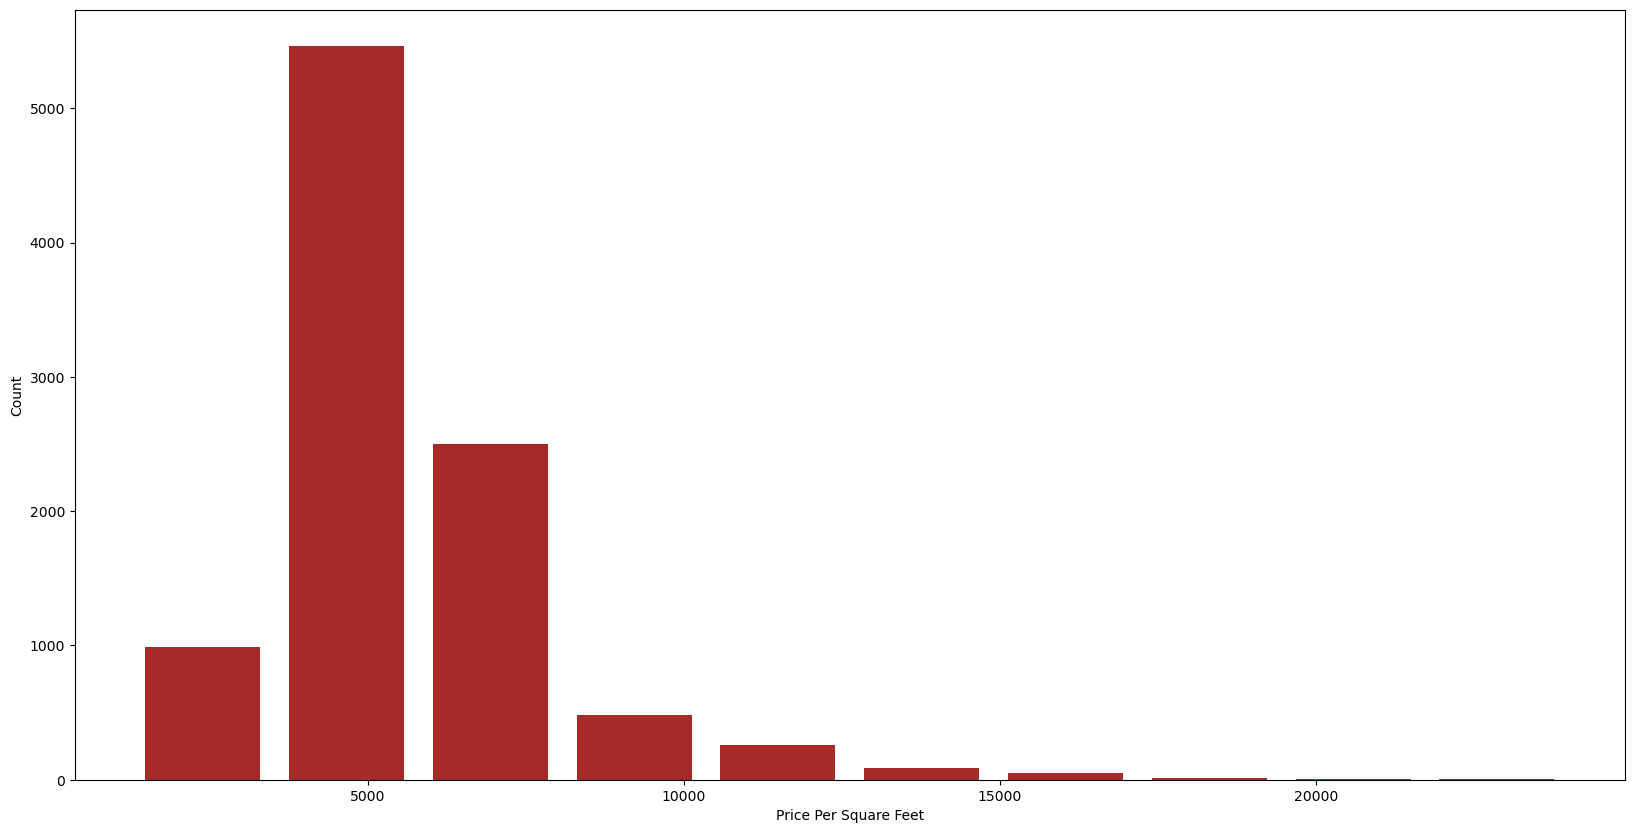

In [57]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data_up.price_per_sqft,rwidth=0.8, color = "brown")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [58]:
unique_values_per_column = data_up.nunique()
print(unique_values_per_column)

area_type            4
location           236
size                21
total_sqft        1622
bath                10
balcony              4
price             1624
bhk                 11
price_per_sqft    5956
dtype: int64


Text(0, 0.5, 'Count')

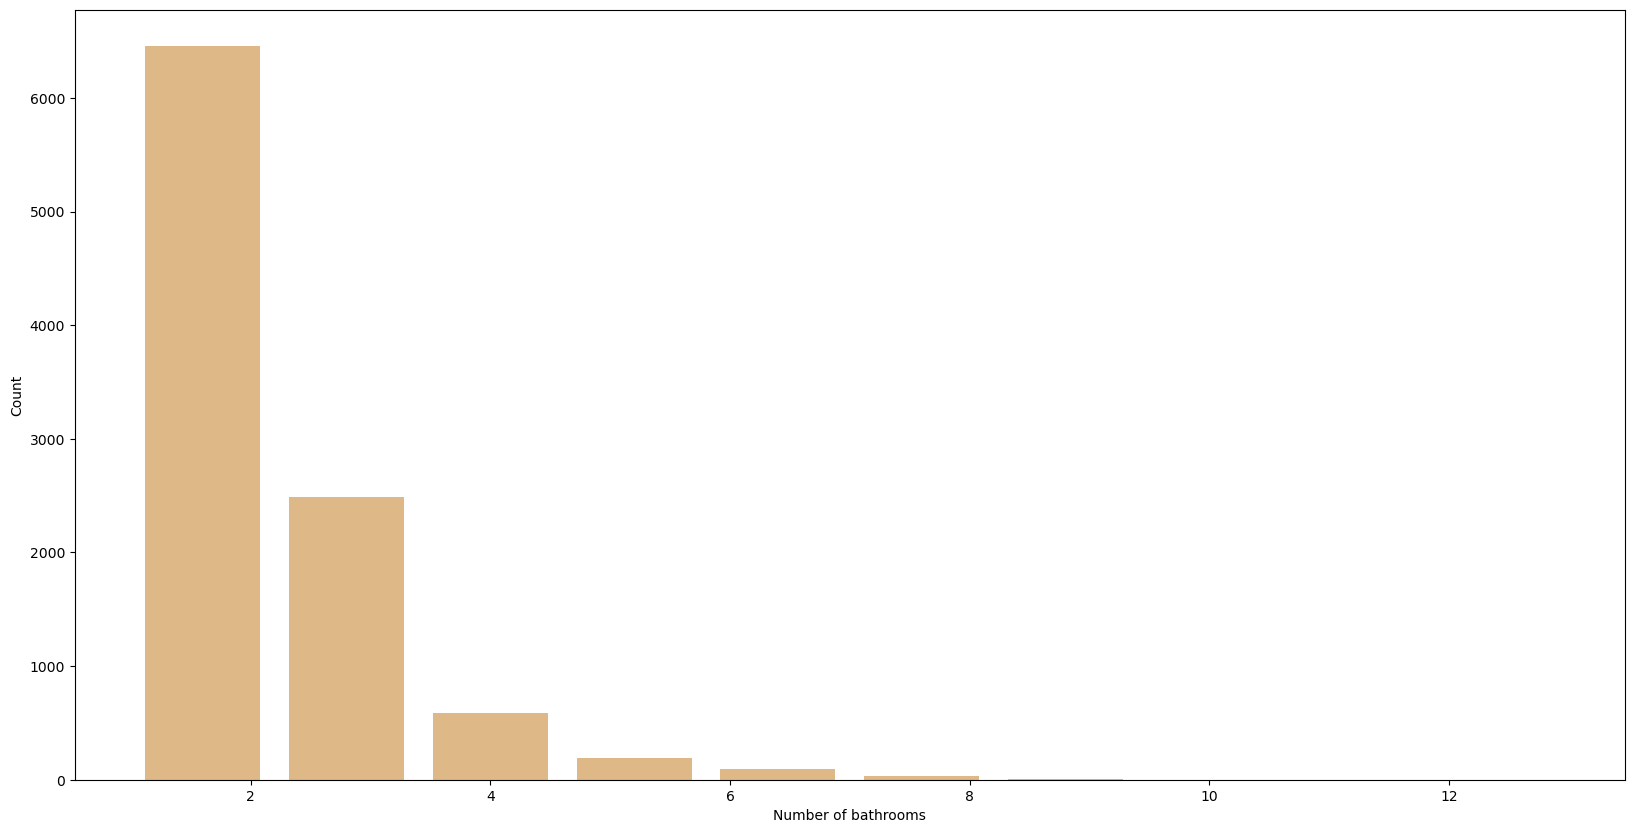

In [59]:
plt.hist(data_up.bath,rwidth=0.8, color = "burlywood")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

### It is unusal to we num of bathrooms more than number of bedrooms:

In [60]:
data_up = data_up[data_up['bath'] <= 10]

### Dropping unecessary columns:

In [61]:
data_up= data_up.drop(['size','price_per_sqft'],axis=1)
data_up.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


### Using One hot encoding for "LOCATION"

In [62]:
dummies = pd.get_dummies(data_up.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
New = pd.concat([data_up,dummies.drop('other',axis='columns')],axis='columns')
New.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
dataset=New.drop('location',axis='columns')
dataset.head()

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Built-up Area,1200.0,2.0,0.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,1235.0,2.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Label encoding for "area_type":

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [67]:
dataset['area_type'] = label_encoder.fit_transform(dataset['area_type'])

In [77]:
dataset

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,2850.0,4.0,1.0,428.00,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,2.0,194.00,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,3.0,235.00,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1200.0,2.0,0.0,130.00,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1235.0,2.0,2.0,148.00,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,0,1256.0,2.0,1.0,65.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9848,3,1353.0,2.0,2.0,110.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9849,2,812.0,1.0,0.0,26.00,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9850,3,1440.0,2.0,2.0,63.93,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model:

In [78]:
x = dataset.drop(['price'],axis='columns')
x.head()

,area_type,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,2850.0,4.0,1.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,2.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,3.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1200.0,2.0,0.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1235.0,2.0,2.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
x.shape

(9851, 240)

In [80]:
y = dataset.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [81]:
y.shape

(9851,)

### Splitting data into train and test dataset:

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7801606693991777